# Matplotlib  
[matplotlib official](https://matplotlib.org/)

<img src="https://matplotlib.org/_static/logo2.png" >

***

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

As you can see we imported both `matplotlib`and `pyplot` from `matplotlib`. `matplotlib` is the library which does the plotting for us, both in many cases we don't need to import it directly, since the `pyplot` servers as an interface to communicate with matplotlib.

We are now going to set the style of our plots to `classic`. later on we will play with this setting to explore what we can do with matplotlib.

In [0]:
plt.style.use('classic')

# We use this line to set the size of our plotted figures.
mpl.rcParams['figure.figsize'] = [6, 4]


And let's kick off with a simple plot :

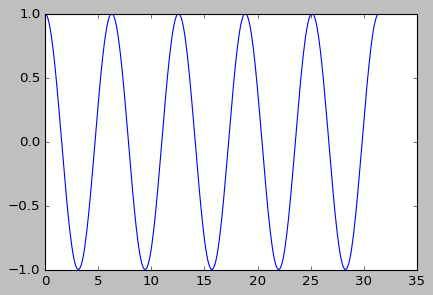

In [3]:
x = np.linspace(0, 10* np.pi, 360)
plt.plot(x, np.cos(x))

If we want to display 2 plots on the same figure, all we have to do is call the plot function twice.

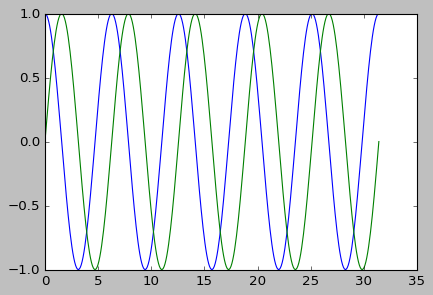

In [4]:
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

## Dual Interface
***
You can use the `matplotlib` in one of the approaches:
1. Matlab interface
1. Object oriented interface
Let's take a look at 2 codes snippets to highlight the difference:

### Matlab interface

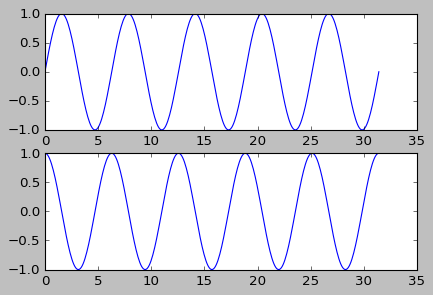

In [5]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

When using the **Matlab** interface we communicate only the the pyplot(plt) module. As you can see in the example above all of our calls are made through using plt. plt then calls the relevant objects for us.

### Object-oriented interface

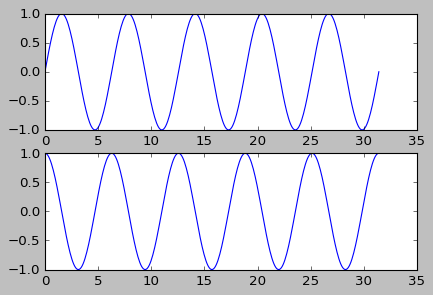

In [6]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In the example above, we first ask pyplot to give us the figure and axes objects (which we will talk about soon) and then we communicate directly with the objects themselves and not through pyplot.  
If we zoom in on the difference - When using the matlab interface we communicate everything through pyplot while in the oop interface we commnunicate with the objects directly (the oop interface is much more versatile as we will see later on).  

**Worth mentioning** - There are cases where manipulating the objects as the same methods names in both interfaces and there are cases where they differ (you'll catch this up as you go).   
What is common is that in both cases, eventually there are objects which will be affected and then plotted on to our screen. So let's understand what these objects are :


## Matplotlib Objects.
<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" width="300">

There are a handful of matplotlib object used for plotting. But in order to understand what goes on behind the scenes it's enough to get familiar with 3 of them:

### The figure
The entire plot sits inside a figure, each plot can have only 1 figure.  
If we think of each plot as an image, then the figure controls the most general attributes of the image : width, height and resolution.  
In the example below the figure is auto generated by matplotlib.

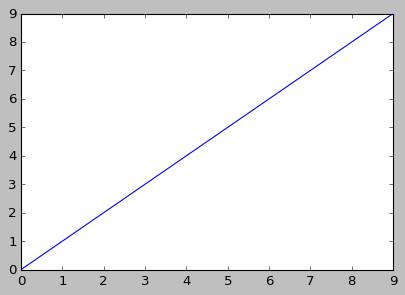

In [7]:
# If we don't create a figure pyplot will create one implicitly.
plt.plot(np.arange(10), np.arange(10))

Below is the code which is being executed when you try to plot. Notice the `gca()` call (short for get current axes), which preform the `gcf()` call (short for get current figure), which then check if there is a current figure and if not creates one.

In [0]:
def plot(*args, scalex=True, scaley=True, data=None, **kwargs):
    return gca().plot(
        *args, scalex=scalex, scaley=scaley, **({"data": data} if data
        is not None else {}), **kwargs)

def gca(**kwargs):
    """
    Get the current :class:`~matplotlib.axes.Axes` instance on the
    current figure matching the given keyword args, or create one.

    Examples
    --------
    To get the current polar axes on the current figure::

        plt.gca(projection='polar')

    If the current axes doesn't exist, or isn't a polar one, the appropriate
    axes will be created and then returned.

    See Also
    --------
    matplotlib.figure.Figure.gca : The figure's gca method.
    """
    return gcf().gca(**kwargs)

def gcf():
    """
    Get the current figure.

    If no current figure exists, a new one is created using
    `~.pyplot.figure()`.
    """
    figManager = _pylab_helpers.Gcf.get_active()
    if figManager is not None:
        return figManager.canvas.figure
    else:
        return figure()
    


Let's create an explicit figure now.  
When you create a figure, matplot automatically saves it as the current figure, and will use it in your next plot.

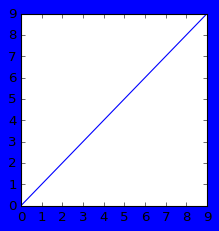

In [9]:
# We can create a figure explicitly and pyplot will use it for plotting.
fig = plt.figure(figsize=(3, 3), facecolor='blue')

# When we will use plt.plot it will use the last figure we created
plt.plot(np.arange(10), np.arange(10))

We don't have to save the figure into a variable if we are not going to use it:

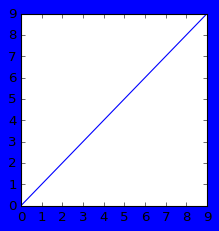

In [10]:
# We can create a figure explicitly and pyplot will use it for plotting.
plt.figure(figsize=(3, 3), facecolor='blue')

# When we will use plt.plot it will use the last figure we created
plt.plot(np.arange(10), np.arange(10))

Internally pyplot will only have a single figure, if we create multiple figure only the last created one will be used.

<Figure size 240x240 with 0 Axes>

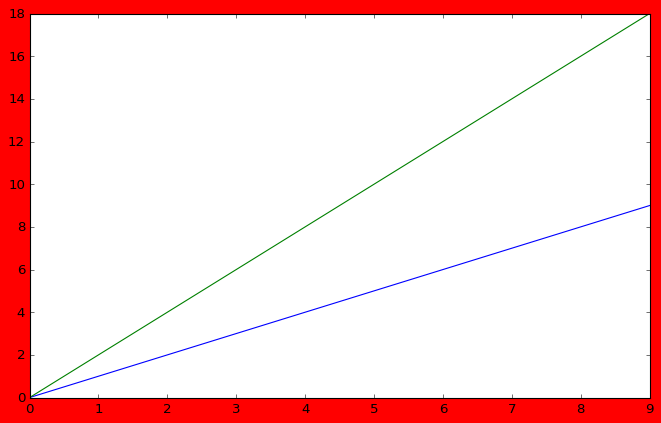

In [11]:
fig_1 = plt.figure(figsize=(3, 3), facecolor='blue')

fig_2 = plt.figure(figsize=(10, 6), facecolor='red')

# The first figure is ignored and the second one is used.
plt.plot(np.arange(10), np.arange(10))
plt.plot(np.arange(10), np.arange(10) * 2)

Once we plotted, the figure is regenerated. 

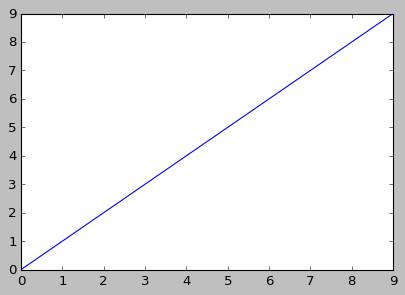

In [12]:
plt.plot(np.arange(10), np.arange(10))

### The axes
The axes is the plot itself, it contains all the object relevant for the plotting.   
we can have multiple axes inside one figure.

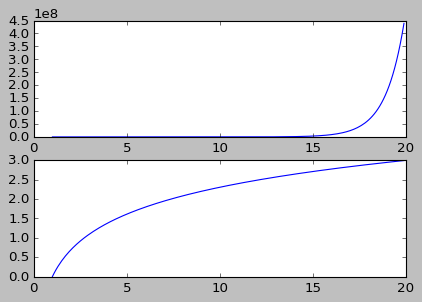

In [13]:
# Create a figure with 2 axes.
fig, axes = plt.subplots(2, 1)

x = np.arange(1, 20, 0.1)
axes[0].plot(x, np.exp(x))
axes[1].plot(x, np.log(x))

If we try to plot using `plt` and not `axes` object we will be disappointed to find out it will only plot on one axes.

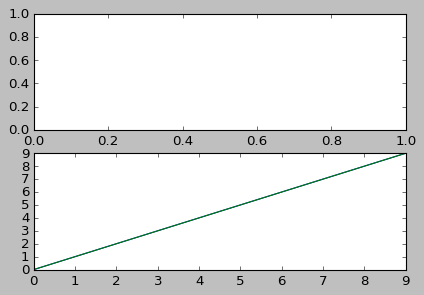

In [14]:
# Create a figure with 2 axes.
fig, axes = plt.subplots(2, 1)

x = np.arange(1, 20)
plt.plot(np.arange(10), np.arange(10))
plt.plot(np.arange(10), np.arange(10))

### The axis 
Well the axis are the axis in each plot. In each axes we have 2 axis, (**x** and __y__). In most cases we will not tinker with this object at all, in some cases we will use pyplot or the axes object to tinker with it and in some rare cases we will act on the object directly.

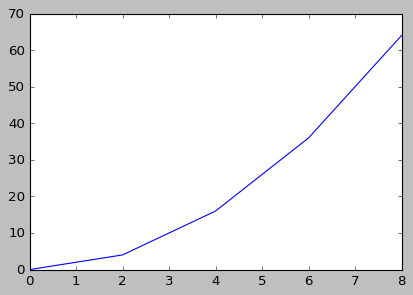

In [15]:
# Simple plot
plt.plot(np.arange(0, 10, 2), np.arange(0, 10, 2) **2)

Now, Let's make the same plot, but display only even x ticks.

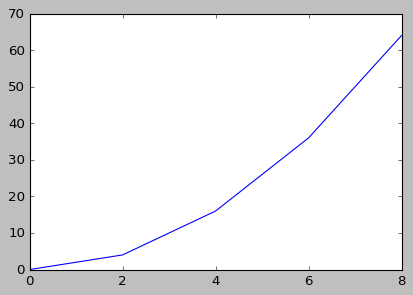

In [16]:
# Get current axes object
ax = plt.gca()

# Get the x axis object
x_axis = ax.xaxis

# Set the xticks
x_axis.set_ticks(np.arange(0, 10, 2))

# plot
plt.plot(np.arange(0, 10, 2), np.arange(0, 10, 2) ** 2)

***
## Exercise
***
Re create the following plot using both the matlab interface and the oop interface.

![image.png](attachment:image.png)

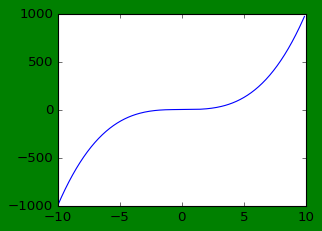

In [17]:
# Your code here - matlab interface
plt.figure(figsize=(4, 3), facecolor='green')

x = np.arange(-10, 10, 0.1)
plt.plot(x, x ** 3)

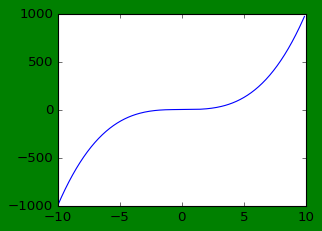

In [18]:
# Your code here - oop interface
fig = plt.figure(figsize=(4, 3), facecolor='green') 
ax = plt.gca()
ax.plot(x, x**3)


***
## Let's plot!

Ok, Now that we have a basic idea of matplot objects we can start plotting. 
But before we start plotting let's change this horrible sytle. [Here](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html) you can find the current available styles. 

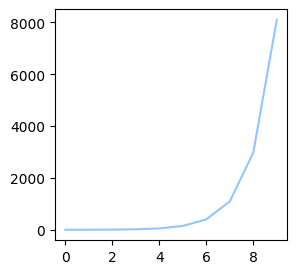

In [19]:
plt.style.use('default') # You need to "reset" befoe you switch styles.
plt.style.use('seaborn-pastel')

# Notice you don't need to save the figure, just creating it is enough.
plt.figure(figsize=(3, 3))
x = np.arange(0, 10, 1)

plt.plot(x, np.exp(x))

## Line Plots
The most basic plot is the line plot we all know and love. You need to supply matplotlib with 2 arrays(__x__ and **y**) of equal size, or only the _y_ axis and it will implicitly create a *x* axis going from 0 to `len(y) -1` with jumps of 1.

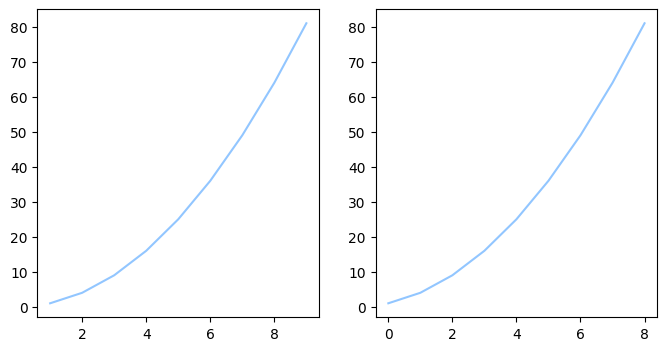

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(np.arange(1,10), np.arange(1, 10) ** 2)
axes[1].plot(np.arange(1, 10)**2)

### Plots attributes
We can play around with some of the line attributes to create different plots. The most basic ones are the color and the type.  
__Color__ : To change the color of the line, just pass either the `c` or `color` parameter.

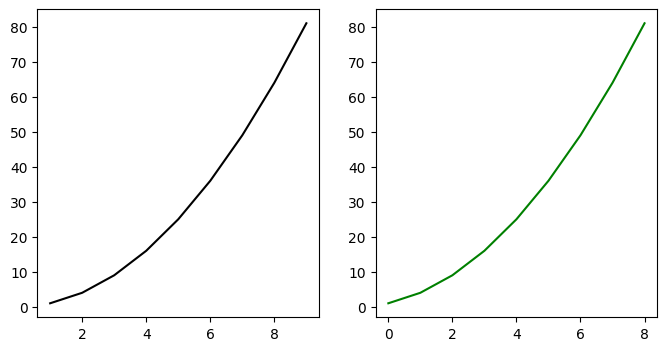

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(np.arange(1,10), np.arange(1, 10) ** 2, color='black')
axes[1].plot(np.arange(1, 10)**2, color='green')

__Line Sytle__ : To change the line style you can pass in the `linestyle` parameter.
(https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)[Here] you can see a list of different style you can use.  

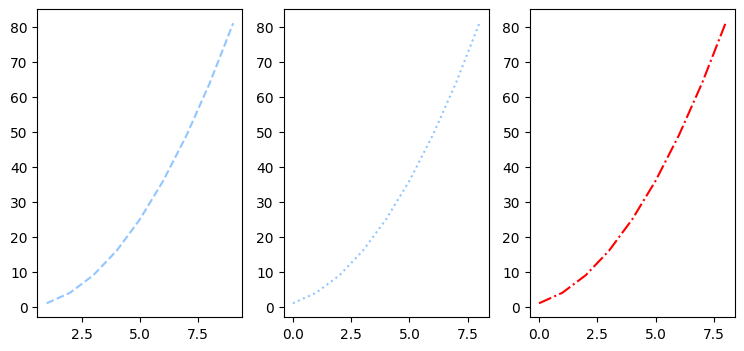

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4))

axes[0].plot(np.arange(1,10), np.arange(1, 10) ** 2, linestyle='--')
axes[1].plot(np.arange(1, 10)**2, linestyle=':')

# The third parameter sent to plot can be used as both the line style and the color
axes[2].plot(np.arange(1, 10)**2, '-.r') 

### Setting limits
We will now discuss some attributes which are relevant for all plots. First - axis limit settings.  
We discussed the axis object earlier. One of the easiest interfaces into the object is by using the axis method.

[-10, 10, -5, 100]

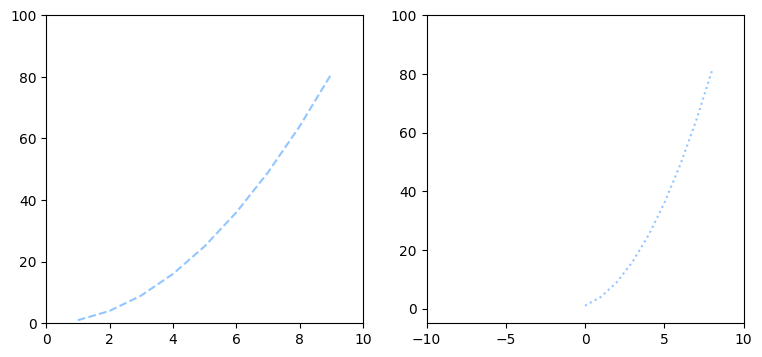

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].plot(np.arange(1,10), np.arange(1, 10) ** 2, linestyle='--')
axes[1].plot(np.arange(1, 10)**2, linestyle=':')

axes[0].axis([0, 10, 0, 100])
axes[1].axis([-10, 10, -5, 100])

You can also pass in strings as the parameter value, and you can see all these parameters [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html)

(-0.4, 8.4, -3.0, 85.0)

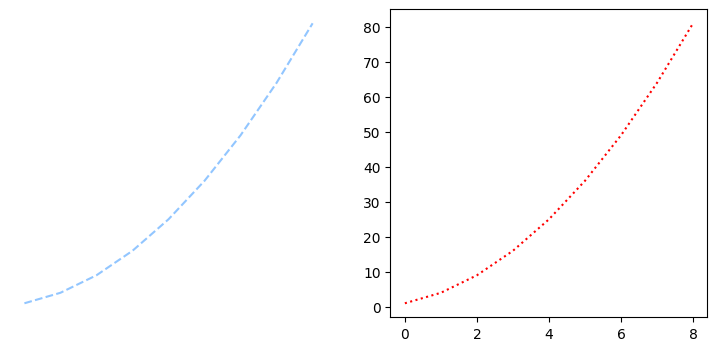

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].plot(np.arange(1,10), np.arange(1, 10) ** 2, linestyle='--')
axes[1].plot(np.arange(1, 10)**2, linestyle=':', color='red')

axes[0].axis('off') # Remove axis
axes[1].axis('tight') # Set x,y axis as tight as possible

Here is another example which come in handy when you want to display linear lines. Without playing with the axis attribute, a single linear line will always look as if it as a slope of 1.

(-0.4, 8.4, 6.0, 94.0)

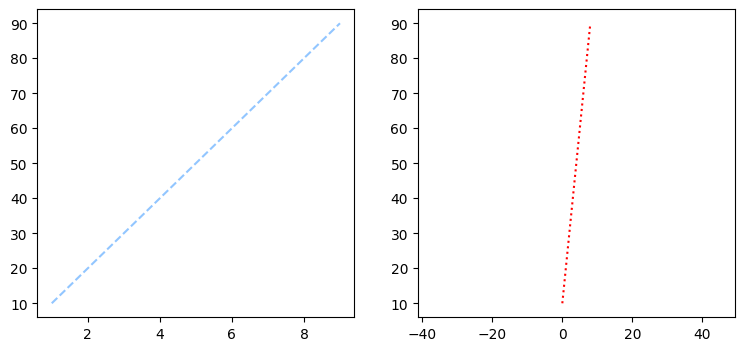

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].plot(np.arange(1,10), np.arange(1, 10) * 10, linestyle='--')
axes[1].plot(np.arange(1, 10) * 10, linestyle=':', color='red')

axes[1].axis('equal') # Set x,y axis to equal scaling (ymax - ymin) = (xmax - xmin)

### Labeling
Another attribute which is relevant for all plots is labeling.  
Unless it for something very specific, Always, and I mean always label the headline and the axis. Always! Whether it's for you HW, your presentation, clients or boss. Always label the headline and the axis. It's easy!


Text(0, 0.5, 'log(x)')

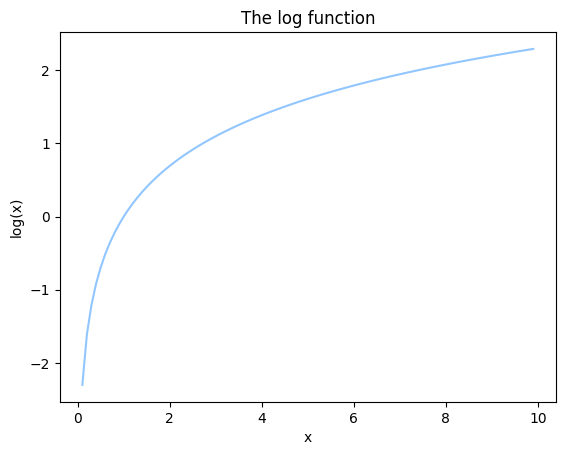

In [26]:
x = np.arange(0.1, 10, 0.1)
plt.plot(x, np.log(x))

plt.title('The log function') # Setting a title
plt.xlabel('x') # Setting the x label
plt.ylabel('log(x)') # Setting the y label

If you were working with the axes object, you'll had to use `set_title`, `set_xlabel` and `set_ylabel`.

***
## Exercise
***
Recreate the following plot: The two lines are $y=x$ and $y=x^2$

![image.png](attachment:image.png)

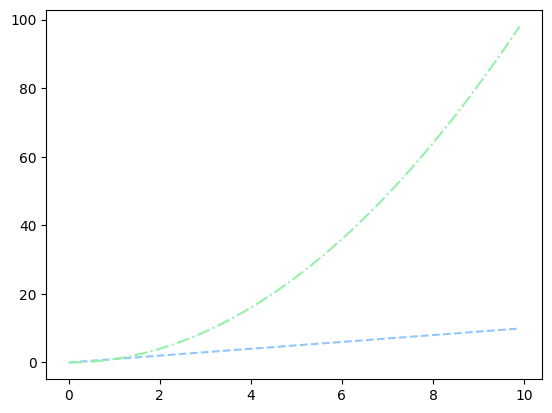

In [27]:
# Your code here
x = np.arange(0, 10, 0.1)
plt.plot(x, x, '--')
plt.plot(x, x**2, '-.')

Recreate the following plot. Both lines are squared functions.
![image.png](attachment:image.png)

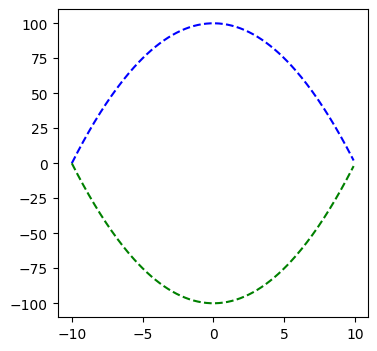

In [28]:
# Your code here
plt.figure(figsize=(4,4))

x = np.arange(-10, 10, 0.1)
plt.plot(x, -(x**2) + 100, linestyle='--', color='blue')
plt.plot(x, (x**2) - 100, linestyle='--', color='green')

## Scatter plots
***
Another very common plot is the scatter plot. While the plots function connects a line between each consecutive points the scatter plots leave the points as is. Meaning, it only shows the points themselves. We use the `scatter` function for that. A picture is worth a thousands words:

Text(0.5, 1.0, 'Normal Distribution')

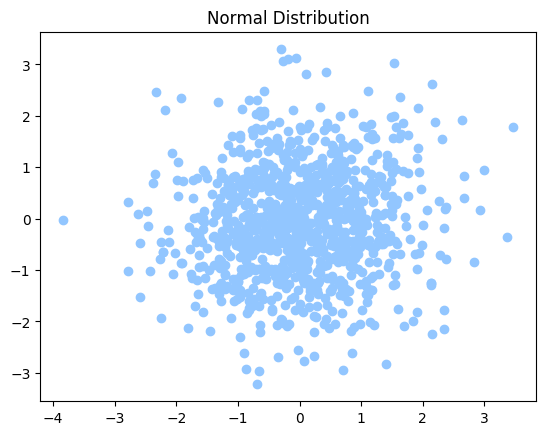

In [29]:
np.random.seed(2611)
points = np.random.normal(loc=0, scale=1, size=(1000, 2))
x, y = points[:, 0], points[:, 1]

plt.scatter(x, y)
plt.title('Normal Distribution')

We can play around with each points color:

Text(0.5, 1.0, 'Colored normal distribution')

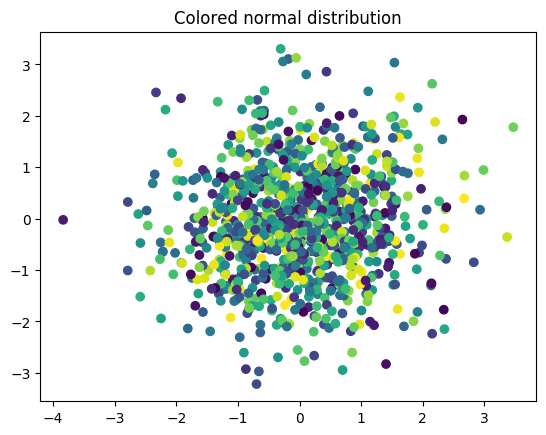

In [30]:
colors = np.random.rand(1000)
plt.scatter(x, y, c=colors)
plt.title('Colored normal distribution')

At each points scale

Text(0.5, 1.0, 'Colored and Scaled Normal Distribution')

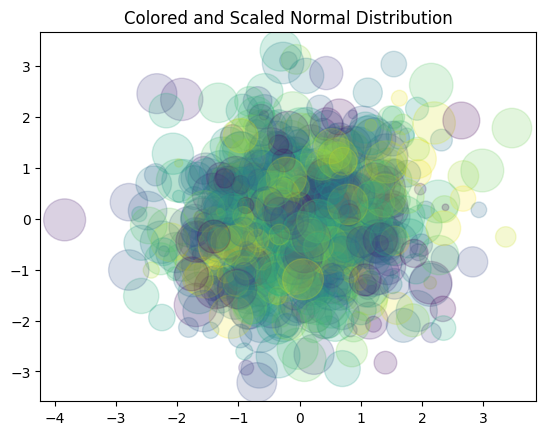

In [31]:
scale = 1000 * np.random.rand(1000)
plt.scatter(x, y, s=scale, c=colors, alpha=0.2)
plt.title('Colored and Scaled Normal Distribution')

It's worth mentioning the you can use the `plot` function for points as well, but you will not be able to control each point separately.

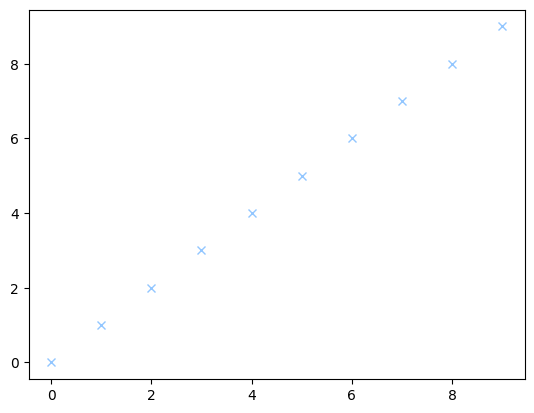

In [32]:
plt.plot(np.arange(10), 'x')

***
## Exercise
***
Create the following scatter plot:
![image.png](attachment:image.png)

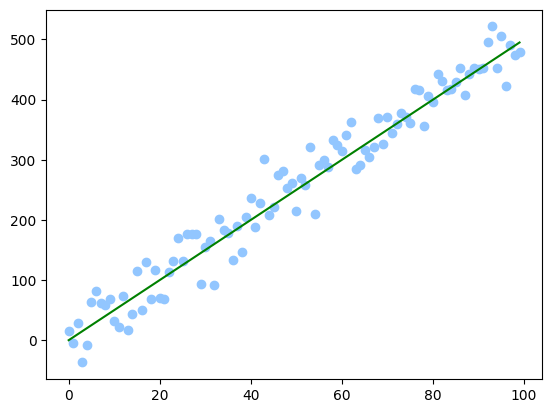

In [33]:
# Create an x variable with values : [0, 1, 2, ... , 99]
x = np.arange(100)

# Create a y variable where each value of x is multiplied by 5
y = x * 5

# Sample 100 points from a normal distribution with mean 0 and std of 30. This is refered to as noise.
points = np.random.normal(loc=0, scale=30, size=100)

# Create the y-value of the points by adding the noise to y.
y = y + points

# plot them (don't forget the line)!
plt.scatter(x, y)
plt.plot(x, x*5, color='green')

##  Histograms
One of the best early stage analysis tool is the histogram plot, which can convey distribution information quickly.

Text(0.5, 1.0, 'Uniform Distribution')

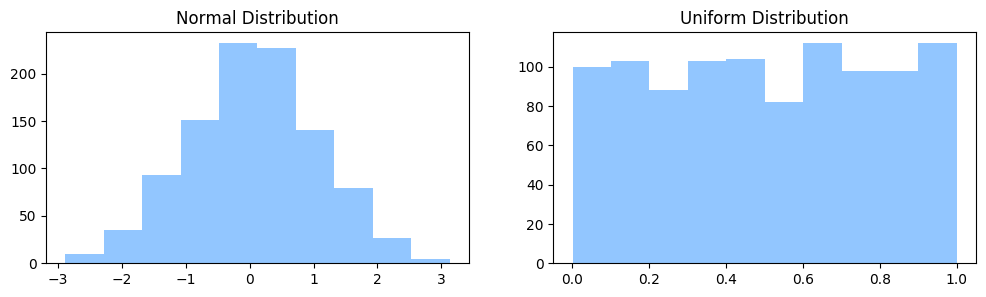

In [34]:
normal_samples = np.random.randn(1000)
uniform_samples = np.random.rand(1000)

fig, axes = plt.subplots(1, 2, figsize=(12, 3))

axes[0].hist(normal_samples)
axes[0].set_title('Normal Distribution')

axes[1].hist(uniform_samples)
axes[1].set_title('Uniform Distribution')


And here is another example with a log normal distribution which you'll discuss next semester:

Text(0.5, 1.0, 'log-normal Distribution')

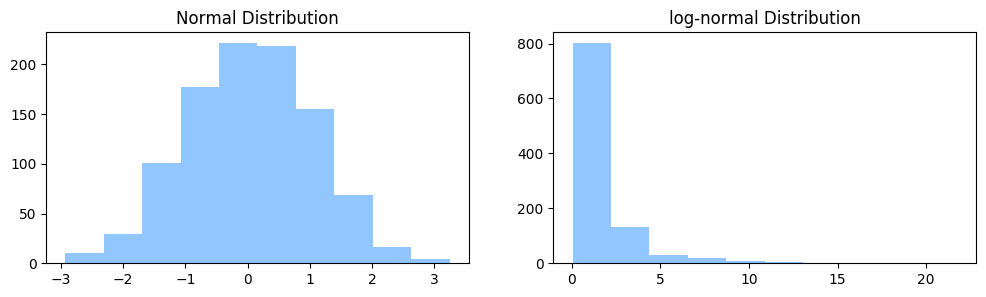

In [35]:
np.random.seed(112211)
normal_samples = np.random.randn(1000)
normal2_samples = np.random.randn(1000)
lognormal_samples = np.exp(normal2_samples)

fig, axes = plt.subplots(1, 2, figsize=(12, 3))

axes[0].hist(normal_samples)
axes[0].set_title('Normal Distribution')

axes[1].hist(lognormal_samples, bins=10)
axes[1].set_title('log-normal Distribution')

Now we have a situation where the histogram plot on the right does a bad job at conveying the information. We can see that most of the values are in the first bin, so we might want to have more bins in our plot:

Text(0.5, 1.0, 'log-normal Distribution')

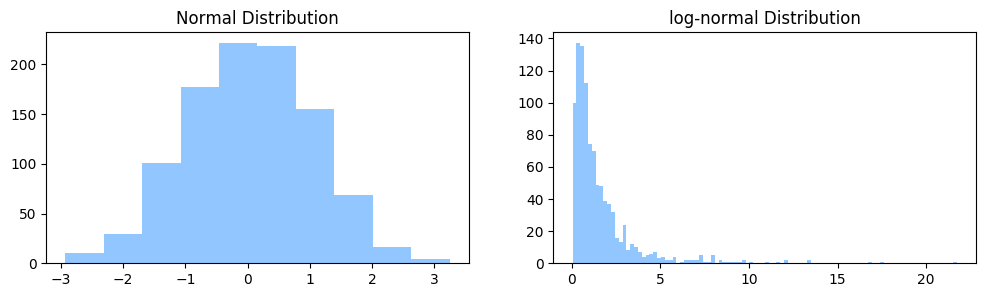

In [36]:
np.random.seed(112211)
normal_samples = np.random.randn(1000)
normal2_samples = np.random.randn(1000)
lognormal_samples = np.exp(normal2_samples)

fig, axes = plt.subplots(1, 2, figsize=(12, 3))

axes[0].hist(normal_samples)
axes[0].set_title('Normal Distribution')

axes[1].hist(lognormal_samples, bins=100)
axes[1].set_title('log-normal Distribution')

The default number of bins is 10. and if you pass a value, $n$, as the number of bins then you will get $n$ equal sized bins. But, If we want, we can pass an array which represent our binning:

(array([ 47., 186., 231.,  46., 443.]),
 array([  0,  10,  50, 100, 110, 200]),
 <a list of 5 Patch objects>)

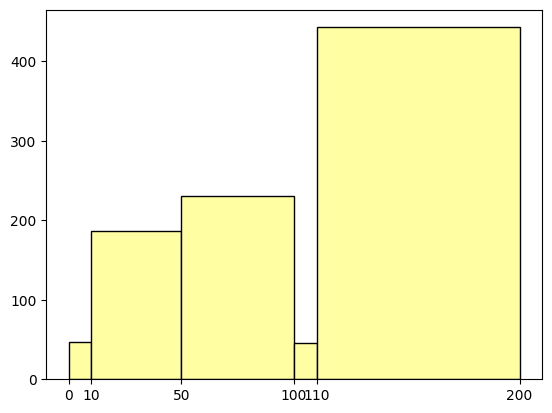

In [37]:
bins = [0, 10, 50, 100, 110, 200]
values = np.random.randint(low=0, high=210, size=1000)


plt.xticks(bins)
plt.hist(values, bins=bins, color='#FFFEA3', edgecolor='black') # Using an hex value to specify the color

#### Real life example
In many cases we would like to compare distribution of different groups. To do that we can plot several histograms on the same axes which can be quickly compared. Let's take a real life example.

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
columns = list(boston.feature_names)
y = boston.target

boston_df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns= columns + ['price'])

In [39]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now that we have our dataframe we can ask a question like : Is the age distribution different for houses above the mean price and below the mean price. We can put all of our newly gained knowledge to perform this actions in just a few lines of code:

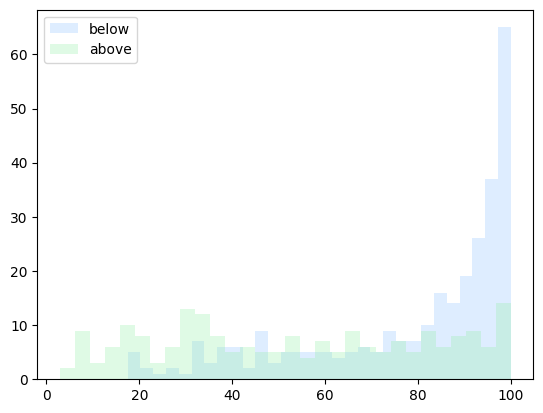

In [40]:
above_mean_price = boston_df['price'] > boston_df['price'].mean()

above_mean = boston_df[above_mean_price]['AGE']
below_mean = boston_df[~above_mean_price]['AGE']

plt.hist(below_mean, alpha=0.3, bins=30, label="below")
plt.hist(above_mean, alpha=0.3, bins=30, label="above")
plt.legend()

Or we can plot the distribution side by side

Text(0.5, 1.0, 'Age for houses with price below the average value')

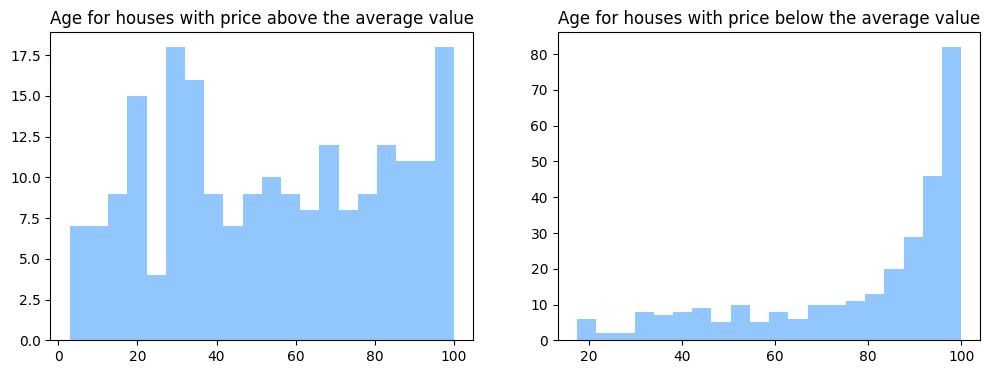

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(above_mean, bins=20)
axes[0].set_title('Age for houses with price above the average value')

axes[1].hist(below_mean, bins=20)
axes[1].set_title('Age for houses with price below the average value')

Clearly, the distribution of the age does not act the same for below and above average houses.

In [42]:
(below_mean > 80).sum()

188

## Exercise

Sample a 1000 points from each of the following distributions:
1. $N(12, 3)$
1. $N(3, 2)$

Combine the samples and display them on a histogram plot. Start with the default parameters then play around with the bins parameter to see the 2 distribution more clearly.

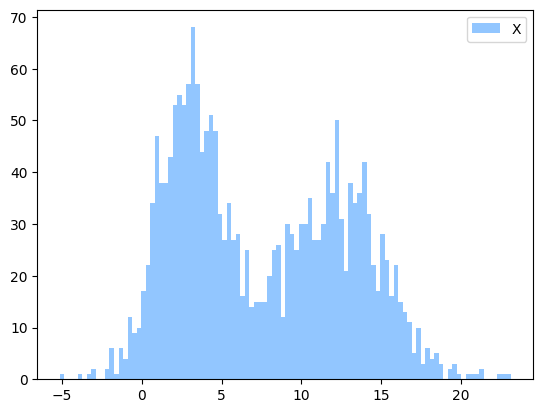

In [43]:
# Your code here
points_1 = np.random.normal(12, 3, 1000)
points_2 = np.random.normal(3, 2, 1000)

y = np.concatenate([points_1, points_2])
plt.hist(y, bins=100, label='X')
plt.legend()
pass

## Bar plots
If we want to display quantities of discrete values then a bar plot is the way to go. In a bar plot we need to give 2 parameters:
1. __x__ : The possible values.
1. __height__: The height of each value.

<BarContainer object of 3 artists>

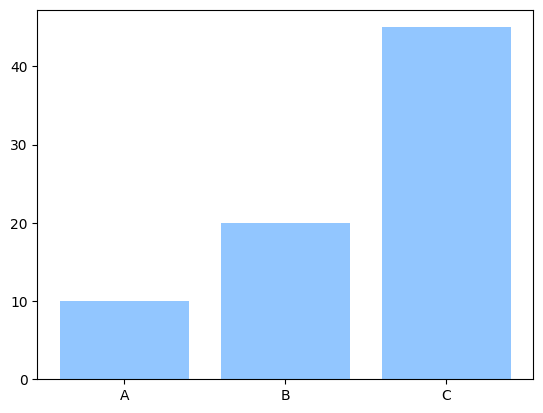

In [44]:
plt.bar(x=['A', 'B', 'C'], height=[10, 20, 45])

## Exercise
Search for the function which will give you the ability to preform the following plot. The colors are a bonus!

![image.png](attachment:image.png)

<BarContainer object of 6 artists>

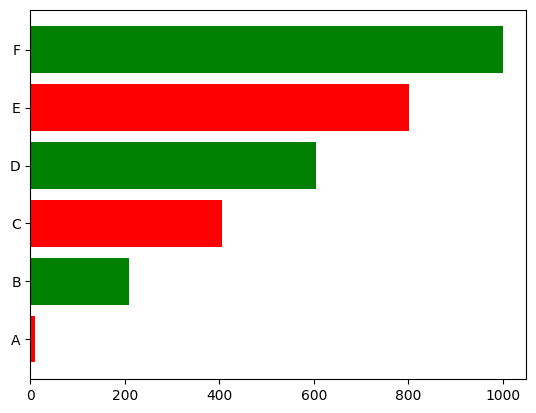

In [45]:
# Your code here
plt.barh(y=list('ABCDEF'), width=np.linspace(10, 1000, 6), color='rg')

## Multiple Plots
***
New section $\rightarrow$ new style!

Text(0.5, 1.0, 'SQRT Function')

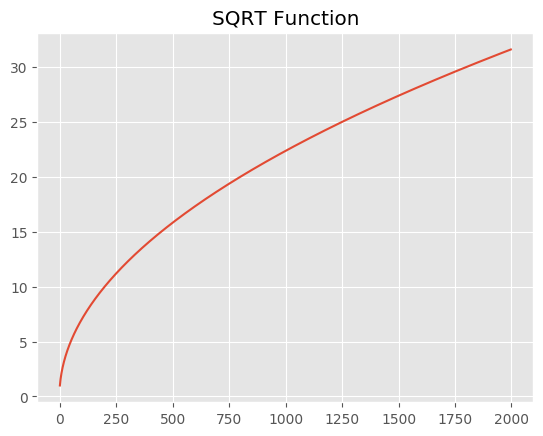

In [46]:
plt.style.use('default') # You need to "reset" befoe you switch styles.
plt.style.use('ggplot')
plt.plot(np.arange(1, 1000, 0.5)**0.5)
plt.title('SQRT Function')

We are going to see 3 ways for creating subplots.
1. using `axes` 
1. using `subplot`
1. using `subplots`

#### Axes
When we call `plt.axes()` a new axes object is created inside of our figure. 

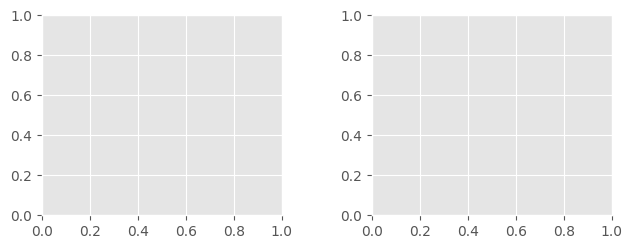

In [47]:
plt.figure(figsize=(6,2))
ax1 = plt.axes([0, 0, 0.4, 1]) # x-pos, y-pos, width, height
ax2 = plt.axes([0.55, 0, 0.4, 1])

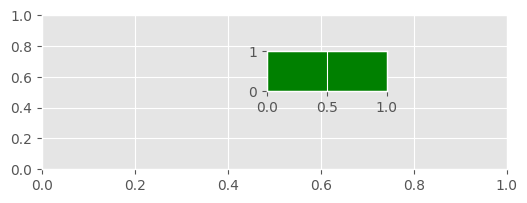

In [48]:
plt.figure(figsize=(6,2))
ax1 = plt.axes() # x-pos, y-pos, width, height
ax2 = plt.axes([0.5, 0.5, 0.2, 0.2])

ax2.set_facecolor('green')

In this way you can create as many axes as you would like, but it's hard to keep track of everything and there is an overhead of calculating exactly where each axes should go. 

#### plt.subplot
So we have a simpler interface to work with:

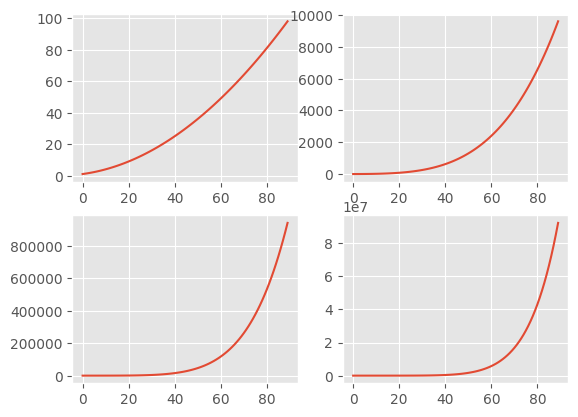

In [49]:
plt.subplot(2, 2, 1)
plt.plot(np.arange(1, 10, 0.1) ** 2)

plt.subplot(2, 2, 2)
plt.plot(np.arange(1, 10, 0.1) ** 4)

plt.subplot(2, 2, 3)
plt.plot(np.arange(1, 10, 0.1) ** 6)

plt.subplot(2, 2, 4)
plt.plot(np.arange(1, 10, 0.1) ** 8)

We can use `plt.subplot` creating a grid of plots. The first call `plt.subplot(r, c, i)` creates a grid of r rows and c columns on the figure. Then each subsequent call `plt.subplot(w, h, i)` will flag pyplot you which to access the i'th axes. To access the axes on the $i$ row and $j$ cell do : $ r \cdot i + j$. __Numbering starts at 1__.  
This is the matlab interface in action.

#### plt.subplots
We have the object oriented approach left. We saw this one throughout this lecture. When we call `plt.subplots` pyplot will create a grid of axes for us and will return us the figure and axes he just created. We can then access each axes using the returned axes array.

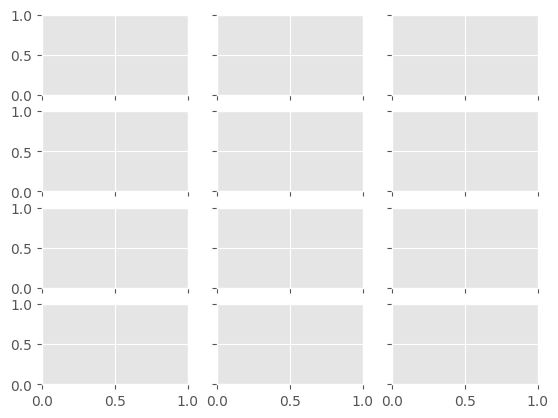

In [50]:
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True)

(array([ 86., 115., 105.,  98., 106.,  88.,  91., 106., 120.,  85.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

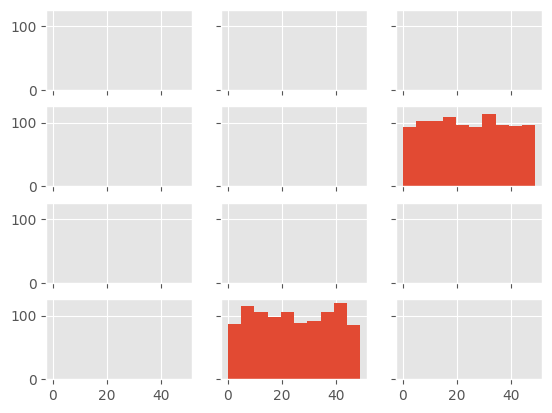

In [51]:
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True)

# Accessing the axes at the first row and the second colums.
axes[1, 2].hist(np.random.randint(low=0, high=50, size=1000))
axes[3, 1].hist(np.random.randint(low=0, high=50, size=1000))

If for some strange reason we want to, we can add another axes using the `plt.axes` command

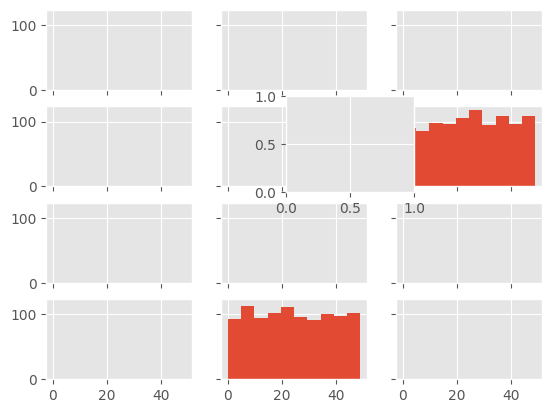

In [52]:
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True)

# Accessing the axes at the first row and the second colums.
axes[1, 2].hist(np.random.randint(low=0, high=50, size=1000))
axes[3, 1].hist(np.random.randint(low=0, high=50, size=1000))

plt.axes([0.5, 0.5, 0.2, 0.2])

***
## Exercise
***
Create a 3 by 2 axes grid. Plot in each axes the function $y=x^i$, where $i$ (starting from 0 up to 5) is the index of the axes and x ranged from -10 to 10 in steps of 0.1

[[<matplotlib.lines.Line2D at 0x7f3ccf3f6470>],

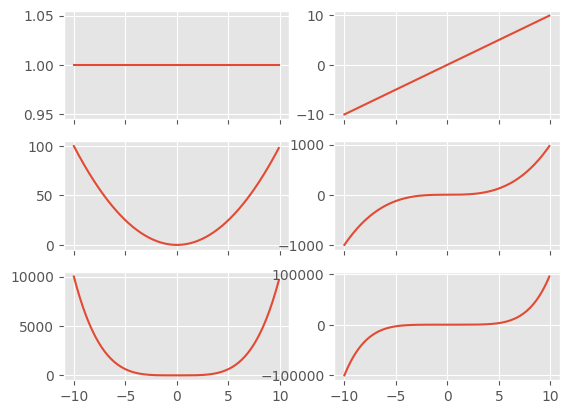

In [53]:
# Your code here
fig, axes = plt.subplots(3, 2, sharex=True, sharey=False)


x = np.arange(-10, 10, 0.1)
[axes[i//2, i % 2].plot(x, x**i) for i in range(6)]

Create the same grid, but now place a green box on the bottom right axes, anywhere you want inside the axes.

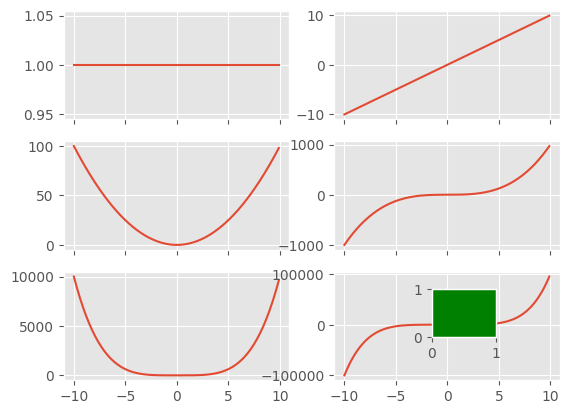

In [54]:
# Your code here
fig, axes = plt.subplots(3, 2, sharex=True, sharey=False)


x = np.arange(-10, 10, 0.1)
[axes[i//2, i % 2].plot(x, x**i) for i in range(6)]

ax = plt.axes([0.7, 0.2, 0.1, 0.1])
ax.set_facecolor('green')


### Summing up
***

So we just to a speedy, subjective tour into `matplotlib`. We saw we have 3 major objects which are apparent in almost every plot we'll do (some might not have axis), and some simple ways to communicate with these objects. We went through the basic plotting options, and while these are basic plots they have the ability to convey a lot of information when we are analyzing data. 

There are obviously many many more plots available from matplot, but hopefully understanding the basic of the module will enable you to quickly pick them up once you need them. 

# References

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) A thorough tour into Numpy. 


# Colophon
This notebook was written by __Yoav Orlev__ and is part of the __intro to Python for data science__ course at IDC Herzliya.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)